# Data Cleaning and Validation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
file_name = 'WELLCOME_APCspend2013_forThinkful.csv'
new_file = 'WELLCOME_APCspend2013_forThinkful-clean.csv'

## Load the data

In [3]:
try:
    df = pd.read_csv(f'./data/{file_name}')
except UnicodeDecodeError:
    print('Unicode encoding error ecountered.')
    pass

Unicode encoding error ecountered.


After loading in the data I quickly noticed that there is an error in the unicode encoding in the file. I decided to force the file to read into a string and inspect the encodings.

In [4]:
with open(f'./data/{file_name}', encoding='utf-8', errors='surrogateescape') as f:
    data = f.read()

In [5]:
data[:1000]

'PMID/PMCID,Publisher,Journal title,Article title,COST (\udca3) charged to Wellcome (inc VAT when charged)\nNA,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in subjects at ultra-high risk for psychosis,\udca30.00\nPMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-negative bacterial surface using lipopolysaccharides from rough strains of escherichia coli,\udca32381.04\n23043264  PMC3506128 ,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related opioids with irreversible ? opioid receptor antagonist effects.",\udca3642.56\n23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor agonist activity.,\udca3669.64\n23438216 PMC3601604 ,ACS,J Org Chem,Regioselective opening of myo-inositol orthoesters: mechanism and synthetic utility.,\udca3685.88\nPMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies of 4-(Thiazol-5-yl)-2-(phenylamino) pyrimidine-5-carbonitrile CDK9 inhibitor

Printing the first 1000 characters of this file it is easy to notice strings ending in with a "\\". These are the badly encoded characters.

## Cleaning up the encodings
I needed a way to search for these bad encodings and replace them with good encodings. To do this, I defined the following procedure:
1. Try saving the file. If there is a bad encoding in the file, it will print an error message with the offending encoding.
2. Open the csv file in Numbers and find the character with the bad encoding.
3. Search for this character on [Graphemica](https://graphemica.com/) and find the Python unicode representation.
4. Create a dictionary to convert the bad encodings to the good encodings.
5. Use a custom function to update the file string with the correct encodings.
6. Repeat steps 1-5 until there are no more error messages when trying to save the file.

In [6]:
bad_to_good = {
    '\udca3': '\u00A3',  # pound
    '\udce1': '\u00E2',  # a hat
    '\udce2': '\u00E2',  # a hat,
    '\udca0': '',  # bad string space
    '\udcb7': '\u00B7',  # middle dot
    '\udc92': '\u2019',  # right single quotation mark
    '\udce9': '\u00E9',  # latin small letter e with acute
    '\udcc7': '\u00C7',  # latin capital letter c with cedilla
    '\udcf6': '\u00F6',  # latin small letter o with diaeresis
    '\udcfc': '\u00FC',  # latin small letter u with diaeresis
    '\udc91': '\u2018',  # left single quotation mark
    '\udc93': '\u201C',  # left double quotation mark
    '\udc94': '\u201D',  # right double quotation mark
    '\udc96': '\u2013',  # en dash
    '\udce8': '\u00E8',  # latin small letter e with grave
    '\udc85': '\u2026',  # horizontal ellipsis
    '\udc90': '\u002D',  # hyphen-minus
    '\udcef': '\u00EF'  # latin small letter i with diaeresis
}

In [7]:
bad_to_good

{'\udca3': '£',
 '\udce1': 'â',
 '\udce2': 'â',
 '\udca0': '',
 '\udcb7': '·',
 '\udc92': '’',
 '\udce9': 'é',
 '\udcc7': 'Ç',
 '\udcf6': 'ö',
 '\udcfc': 'ü',
 '\udc91': '‘',
 '\udc93': '“',
 '\udc94': '”',
 '\udc96': '–',
 '\udce8': 'è',
 '\udc85': '…',
 '\udc90': '-',
 '\udcef': 'ï'}

In [8]:
def clean_unicode(bad_string):
    good_string = bad_string
    for key, value in bad_to_good.items():
        good_string = good_string.replace(key, value)
    return good_string

In [9]:
data_clean_unicode = clean_unicode(data)

In [10]:
f = open(f'./data/{new_file}', 'w')
f.write(data_clean_unicode)
f.close()

In [11]:
# bad_index = 177075
# strings_to_print = 500
# print(data_clean_unicode[bad_index-strings_to_print:bad_index])

## Load the data... again!
Now that the unicode encodings have been fixed, the data can be read into a `DataFrame` successfully.

In [12]:
df = pd.read_csv(f'./data/{new_file}')

In [13]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


## Rename Columns
The cost column, while descriptive, is unnecessarily long. I will shorten it to just _Cost_.

In [15]:
df = df.rename(columns={'COST (\u00A3) charged to Wellcome (inc VAT when charged)': 'Cost'})

In [16]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title', 'Cost'], dtype='object')

## Missing Journals
Let's find out if there are any missing journals and replace them with the string 'Unknown'.

In [17]:
df[df['Journal title'].isna()]

,PMID/PMCID,Publisher,Journal title,Article title,Cost
986,NaN,MacMillan,NaN,Fungal Disease in Britain and the United State...,£13200.00


There is only one missing journal.

In [18]:
df['Journal title'].fillna('Unknown', inplace=True)

In [19]:
df[df['Journal title'] == 'Unknown']

,PMID/PMCID,Publisher,Journal title,Article title,Cost
986,NaN,MacMillan,Unknown,Fungal Disease in Britain and the United State...,£13200.00


In [20]:
df = df.sort_values(by='Journal title').copy()

## Journal titles
Let's see how many unique journal titles there are.

In [21]:
dirty_titles = len(np.unique(df['Journal title'].values))
print(f'There are {dirty_titles} dirty journal titles.')
for title in np.unique(df['Journal title'].values):
    print(title)

There are 985 dirty journal titles.
ACS Chemical Biology
ACS Chemical Neuroscience
ACS NANO
ACS Nano
ACTA F
AGE
AIDS
AIDS Behav
AIDS Care
AIDS Journal
AIDS Research and Therapy
AIDS UK
ASN Neuro
Academy of Nutrition and Dietetics
Acta Crystallographica Section D,  Biological Crystallography 
Acta Crystallographica Section D: Biological Crystallography
Acta Crystallographica Section F: Structural Biology and Crystallization Communications
Acta Crystallographica, Section D
Acta Crystallography D
Acta D
Acta Dermato Venereologica
Acta Diabetologica
Acta Neuropathol
Acta Neuropathologica
Acta Opthalmologica
Acta Physiol
Addiction
Advances in Experimental Medicine and Biology
Age
Age and Ageing
Ageing & Society
Aging Cell
Aids Care
Alcohol and Alcoholism
Alimentrary Pharmacology & Therapeutics
Am J Bioeth
Am J Trop Med Hyg
Americal Journal of Psychiatry
American Chemical Society
American Ethnologist
American Jnl Epidemiology
American Journal for Clinical Nutrition
American Journal of Bioeth

Journal of Anthropological Archaeology
Journal of Antimicrobial Chemotherapy
Journal of Applied Crystallography
Journal of Applied Physiology
Journal of Archaeological Science
Journal of Autism and Development Disorders
Journal of Autism and Developmental Disorders
Journal of Bacteriology
Journal of Behavior Therapy and Experimental Psychiatry
Journal of Behaviour therapy and Experimental Psychiatry
Journal of Bioenergetics and Biomembranes
Journal of Bioethical Inquiry
Journal of Biol Chem
Journal of Biological Chemistry
Journal of Biological Physics
Journal of Biomedical Graphics and Computing
Journal of Bone and Mineral Research
Journal of Cell Physiology
Journal of Cell Science
Journal of Cellular Biochemistry
Journal of Cerebral Blood Flow and Metabolism
Journal of Chemical Information and Modeling
Journal of Cheminformatics
Journal of Child Psychology and Psychiatry
Journal of Clinical Endocrinology
Journal of Clinical Endocrinology and Metabolism
Journal of Clinical Epidemiology

There is a lot of inconsistencies in journal title. Let's clean up the names.

## Cleaning Journal Titles
I will clean the journal titles it two steps. First, I will replace any misspelled or incomplete words with new words. Second, I will replace any inconsistent or wrong titles with new titles. For each step I will define a dictionary to map bad words/titles with good words/titles. Both steps will be performed in separate, custom functions. A third funtion will combine these two functions so the journal title cleaning can be done in one line of code.

In [22]:
replacement_words = {
    '&': 'And',
    'Int': 'International',
    'Antimicobial': 'Antimicrobial',
    'Agfents': 'Agents',
    'Behavior': 'Behaviour',
    'Biochem': 'Biochemical',
    'Am': 'American',
    'Americal': 'American',
    'J': 'Journal of',
    'Bioeth': 'Bioethics--Neuroscience',
    'Jnl': 'Journal of',
    'Anal': 'Analytical',
    'Angew': 'Angewandte',
    'Angewande': 'Angewandte',
    'Ed': 'Edition',
    'Chems': 'Chemie',
    'Bjp': 'Bjophthalmol',
    'Biol': 'Biology',
    'Brt': 'British',
    'Heath': 'Health',
    'Clinicla': 'Clinical',
    'Curr': 'Current',
    'Biol.': 'Biology',
    'Dev': 'Developing',
    'Bioeth.': 'Bioethics',
    'Epigentics': 'Epigenetics',
    'Eur': 'European',
    'Immunol': 'Immunology',
    'Psychiatty': 'Psychiatry',
    'J.': 'Journal',
    'Heptology': 'Hepatology',
    'Hum': 'Human',
    'Resour': 'Resources',
    'Mol': 'Molecular',
    'Sci.': 'Science',
    'Respi': 'Respiratory',
    'Joural': 'Journal',
    'Behavioral': 'Behavioural',
    'Inyernational': 'International',
    'Jounral': 'Journal',
    'Od': 'Of',
    'Jaids': '',
    '(Jaids)': '',
    'Syndroms': 'Syndromes',
    'Chem': 'Chemistry',
    'Ageing': 'Aging',
    'Infect': 'Infection',
    'Pharm': 'Pharmacology',
    'Biotechnol.': 'Biotechnology',
    'Neurolmage': 'Neuroimage',
    'Acids': 'Acid',
    'Archiv': 'Archive',
    'Philos': 'Philosophical',
    'Soc': 'Society',
    '1': 'One',
    '(': '',
    'Rep': 'Reports',
    'Sci': 'Scientific',
    'Sex': 'Sexually',
    'Transm': 'Transmitted',
    'Infect.': 'Infections',
    'Epidemiol': 'Epidemiology',
    'Neuropathol': 'Neuropathologica',
    'of': 'Of',
    'Trans': 'Transactions',
    'Ophthalmology': 'Opthalmology',
    'Bioohysica': 'Biophysica',
    'Biologicial': 'Biological',
    'Genomics.': 'Genomics',
    'Jounal': 'Journal',
    'Print': '',
    'Online': '',
    'Epidemology': 'Epidemiology',
    'Virol': 'Virology',
    'Visulaized': 'Visualized',
    'Experiements': 'Experiments',
    'Expermiments': 'Experiments',
    'Molecluar': 'Molecular',
    'Parsitology': 'Parasitology',
    'Negected': 'Neglected'
}

In [23]:
replacement_titles = {
    'Acta Crystallographica Section D, Biological Crystallography': 'Acta D',
    'Acta Crystallographica Section D: Biological Crystallography': 'Acta D',
    'Acta Crystallographica Section F: Structural Biology And Crystallization Communications': 'Acta F',
    'Biochemical Journals': 'Biochemical Journal',
    'Cell Death Differentiation': 'Cell Death And Differentiation',
    'Child: Care, Health Development': 'Child: Care, Health And Development',
    'Clinical Infectious Disease': 'Clinical Infectious Diseases',
    'Haematologica/The Haematology Journal': 'Haematologica',
    'Human Resources Health': 'Human Resources For Health',
    'Journal Biological Chemistry': 'Journal Of Biological Chemistry',
    'Journal Of Autism And Development Disorders': 'Journal Of Autism And Developmental Disorders',
    'Journal Of Biology Chem.': 'Journal Of Biological Chemistry',
    'Journal Of Biology Chemistry': 'Journal Of Biological Chemistry',
    'Journal Of Clin Microbiol': 'Journal Of Clinical Microbiol',
    'Journal Of Infection': 'Journal Of Infectious Diseases',
    'Journal Of Infection Dis': 'Journal Of Infectious Diseases',
    'Journal Of Med Chem.': 'Journal Of Med Chemistry',
    'Journal Of Of The International Neuropsychological Society': 'Journal Of The International Neuropsychological Society',
    'Journal Of The Royal Society, Interface': 'Journal Of The Royal Society Interface',
    'Microbes Infection': 'Microbes And Infection',
    'Marten Child Nutr': 'Maternal And Child Nutrition',
    'Molecular Bio': 'Molecular Biology',
    'Nephrology Dialysis Transplantation': 'Nephrology Dialysis And Transplantation',
    'Parasit Vectors.': 'Parasites And Vectors',
    'Pediatr Infection Dis Journal Of': 'Journal Of Pediatric Infectious Diseases',
    'Philosophical Transactions B': 'Philosophical Transactions',
    'Philosophical Transactions Of The Royal Society Of London. Series B, Biological Sciences': 'Philosophical Transactions',
    'Philosophical Transactions R Society London B Biology Scientific': 'Philosophical Transactions',
    'Plos Medicine': 'Plos Medicine Journal',
    'Plos Ntd': 'Plos Neglected Tropical Diseases',
    'Plosone': 'Plos One',
    'Pnas (Proceedings Of The National Academy Of Sciences Of The United States Of America': 'Proceedings Of The National Academy Of Sciences',
    'Proceedings Of The National Academy Of Sciences (Pnas)': 'Proceedings Of The National Academy Of Sciences',
    'Proceedings Of The National Academy Of Sciences Of The United States Of America': 'Proceedings Of The National Academy Of Sciences',
    'Proceddings Of The National Academy Of Sciences Of Usa': 'Proceedings Of The National Academy Of Sciences',
    'Proc Natl Acad Scientific U S A.': 'Proceedings Of The National Academy Of Sciences',
    'Proceedings Of Royal Society': 'Proceedings Of The Royal Society',
    'Studies In History And Philosophy Of Science Part C: Studies In History And Philosophy Of Biological And Biomedical Sciences': 'Studies In History And Philosophy Of Science Part C',
    'Trop Med International Health': 'Tropical Medicine And International Health',
    'Acta Crystallography D': 'Acta Crystallographica, Section D'
}

In [24]:
def split_replace_combine(x, old, new):
    x_split = [y for y in x.split(' ') if y != '']  # Remove any extra spaces in journal title
    for i, word in enumerate(x_split):
        if len(word) == len(old):
            x_split[i] = x_split[i].replace(old, new)
    return ' '.join(x_split).strip()

In [25]:
def replace_title(x, old, new):
    if len(x) == len(old):
        x = x.replace(old, new)
    return x

In [26]:
def clean_titles(df):
    
    # Remove extra spaces
    df['Journal title'] = df['Journal title'].apply(lambda x: x.strip())

    # Make all entries title case
    df['Journal title'] = df['Journal title'].apply(lambda x: x.lower().title())
    
    # Replace bad or misspelled words in titles
    for key, value in replacement_words.items():
        df['Journal title'] = df['Journal title'].apply(split_replace_combine, args=(key, value))
        
    # Replace inconsistent or wrong titles
    for key, value in replacement_titles.items():
        df['Journal title'] = df['Journal title'].apply(replace_title, args=(key, value))
        
    unique_titles = len(np.unique(df['Journal title'].values))
    print(f'There are {unique_titles} unique clean titles.')
    return df

In [27]:
df_clean_titles = clean_titles(df)
for title in np.unique(df_clean_titles['Journal title'].values):
    print(title)

There are 779 unique clean titles.
Academy Of Nutrition And Dietetics
Acs Chemical Biology
Acs Chemical Neuroscience
Acs Nano
Acta Crystallographica, Section D
Acta D
Acta Dermato Venereologica
Acta Diabetologica
Acta F
Acta Neuropathologica
Acta Opthalmologica
Acta Physiol
Addiction
Advances In Experimental Medicine And Biology
Age
Age And Aging
Aging And Society
Aging Cell
Aids
Aids Behav
Aids Care
Aids Journal
Aids Research And Therapy
Aids Uk
Alcohol And Alcoholism
Alimentrary Pharmacology And Therapeutics
American Chemical Society
American Ethnologist
American Journal For Clinical Nutrition
American Journal Of Bioethics--Neuroscience
American Journal Of Clinical Nutrition
American Journal Of Epidemiology
American Journal Of Geriatric Psychiatry
American Journal Of Human Genetics
American Journal Of Medical Genetics
American Journal Of Medical Genetics Part A
American Journal Of Pathology
American Journal Of Preventive Medicine
American Journal Of Psychiatry
American Journal Of Pub

## Convert Cost from Strings to Floats
The costs are strings that include the British pound sign (&pound;) as well as the dollar sign ($). I will remove these currency symbols and convert the strings into floating point numbers. This way I can calculate statistics using the cost.

In [28]:
def clean_cost(df):
    df['Cost'] = df['Cost'].apply(lambda x: x.replace('\u00A3', ''))
    df['Cost'] = df['Cost'].apply(lambda x: x.replace('$', ''))
    df['Cost'] = df['Cost'].apply(lambda x: float(x))
    return df

In [29]:
df_clean_cost = clean_cost(df_clean_titles)

In [30]:
df_clean_cost.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost,2127.0,24067.339972,146860.665559,0.0,1280.0,1884.01,2321.305,999999.0


## Journal Counts
I am interested in finding the top five journals. Therefore, I will create an ordered list of journal counts using `groupby()` in Pandas.

In [31]:
def count_journals(df):
    df_journal_count = df_clean_cost.loc[:, ['Journal title', 'Cost']].groupby('Journal title').count()
    df_journal_count = df_journal_count.sort_values(by='Cost', ascending=False).reset_index()
    return df_journal_count.rename(columns={'Cost': 'Journal Count'}).head().copy()

In [32]:
df_journal_count = count_journals(df_clean_cost)

In [33]:
df_journal_count

,Journal title,Journal Count
0,Plos One,207
1,Journal Of Biological Chemistry,64
2,Neuroimage,31
3,Nucleic Acid Research,29
4,Proceedings Of The National Academy Of Sciences,29


Now that I have found the titles for the top five journals, I can create a `DataFrame` that only includes the articles printed in these journals.

In [34]:
df_top_five = df_clean_cost[df['Journal title'].isin(df_journal_count['Journal title'])]

Let's create a boxplot to view the distribution in article costs for each of the top five journals.

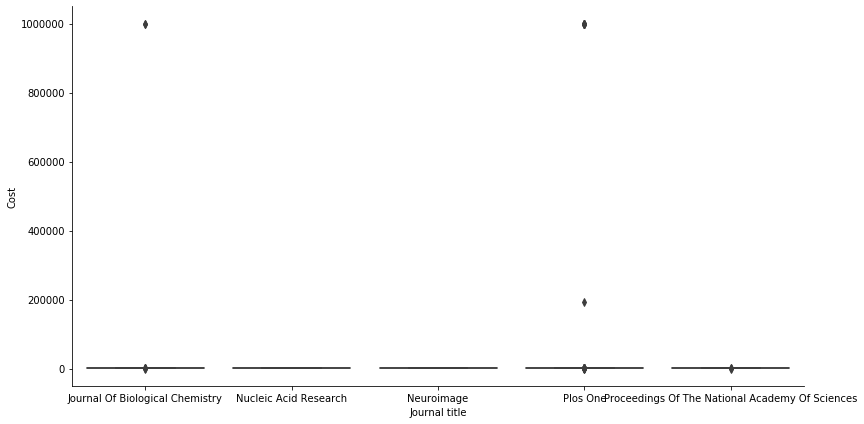

In [35]:
sns.catplot(x='Journal title', y='Cost', data=df_top_five, height=6, aspect=12/6, kind='box')
plt.show()

There are three, extreme, unreasonable values for the cost here. Let's set these values equal to the median value for each journal that they are in.

In [36]:
def remove_outliers(df, cutoff):
    for title in df['Journal title'].unique():
        median_value = df.loc[df['Journal title'] == title, 'Cost'].median()
        df.loc[df['Journal title'] == title, 'Cost'] = df.loc[df['Journal title'] == title, 
                                                              'Cost'].apply(lambda x: x if x < cutoff 
                                                                            else median_value)
    return df

In [37]:
df_top_five_no_outliers = remove_outliers(df_top_five, 100000)

/Users/dave/anaconda3/envs/py_36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


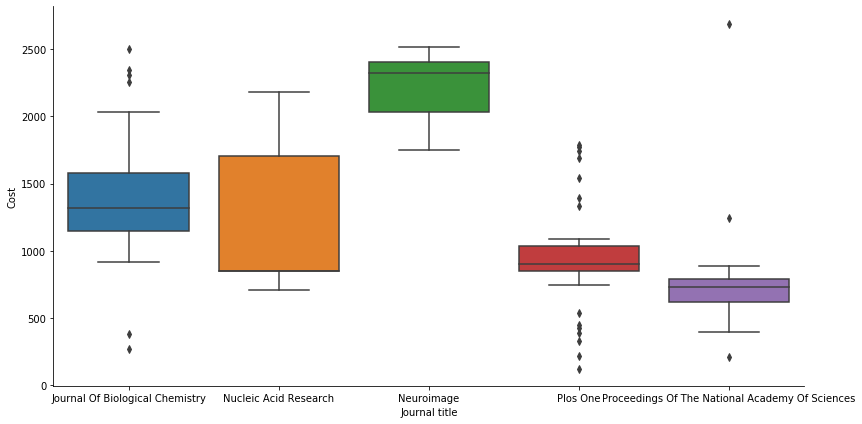

In [38]:
sns.catplot(x='Journal title', y='Cost', data=df_top_five_no_outliers, height=6, aspect=12/6, kind='box')
plt.show()

Now the costs look more reasonable.

## Cost Statistics
Finally, I will compute the mean, median and standard deviation for the article costs in each of the top five journals.

In [39]:
df_top_five_stats = df_top_five_no_outliers.loc[:, 
                                                ['Journal title', 'Cost']].groupby(['Journal title']).agg([np.mean,
                                                                                                           np.median,
                                                                                                           np.std])

In [40]:
df_top_five_stats.columns = ['_'.join(x) for x in df_top_five_stats.columns.ravel()]

In [41]:
df_top_five_stats

,Cost_mean,Cost_median,Cost_std
Journal title,,,
Journal Of Biological Chemistry,1386.849531,1319.4375,403.464768
Neuroimage,2212.181290,2326.4300,273.193244
Nucleic Acid Research,1162.344828,852.0000,442.150934
Plos One,933.432464,899.3400,190.798866
Proceedings Of The National Academy Of Sciences,777.308621,732.2500,407.737209
